In [1]:
#импорт библиотек
import numpy as np
import pandas as pd
#библиотеки для графиков
import seaborn as sns
import matplotlib.pyplot as plt
#библиотеки для модели
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
#считывание данных
#NH3
nh3_2rh_25t = pd.read_excel('Данные для МО/NH3_100_200_300_500 ppm.xlsx', sheet_name='Untitled')
nh3_25rh_25t = pd.read_excel('Данные для МО/NH3_100_200_300_500 ppm_RH25%.xlsx', sheet_name='Untitled')
# nh3_50rh_25t = pd.read_excel('Данные для МО/NH3_100_200_300_500 ppm_RH50%.xlsx', sheet_name='Untitled')
# nh3_75rh_25t = pd.read_excel('Данные для МО/NH3_100_200_300_500 ppm_RH75%.xlsx', sheet_name='Untitled')
nh3_2rh_25t_another_ppm = pd.read_excel('Данные для МО/NH3_10_25_50 ppm_RH2%_Room temperature.xlsx', sheet_name='Untitled')

# NO2
no2_2rh_25t = pd.read_excel('Данные для МО/NO2_2_5_10 ppm_ RH_2%.xlsx', sheet_name='Untitled')
no2_25rh_25t = pd.read_excel('Данные для МО/NO2_2_5_10 ppm_RH_25%.xlsx', sheet_name='Untitled')
no2_50rh_25t = pd.read_excel('Данные для МО/NO2_2_5_10 ppm_RH_50%.xlsx', sheet_name='Untitled')
no2_75rh_25t = pd.read_excel('Данные для МО/NO2_2_5_10 ppm_RH_75%.xlsx', sheet_name='Untitled')
no2_2rh_50t = pd.read_excel('Данные для МО/NO2_2_5_10 ppm_temp_50.xlsx', sheet_name='Untitled')
no2_2rh_75t = pd.read_excel('Данные для МО/NO2_2_5_10 ppm_temp_70_RH2%.xlsx', sheet_name='Untitled')

In [3]:
#строим график зависимости сопротивления от времени
def dependency_graphs(gas, title):
    gas = gas.iloc[1:]# для того чтобы убрать (0,0)
    # Построим точечный график
    plt.figure(figsize=(6, 4))# размер графика
    sns.scatterplot(x='Time [с]', y='R [Ом]', data=gas)# что и откуда берем

    plt.xlabel('Время')#ну как бы просто название
    plt.ylabel('Сопротивление')#название игрека
    title_string = f'Точечный график зависимости сопротивления от времени газа {title}'
    plt.title(title_string)
    plt.grid(True)#добавим сеточку

    return plt.show()

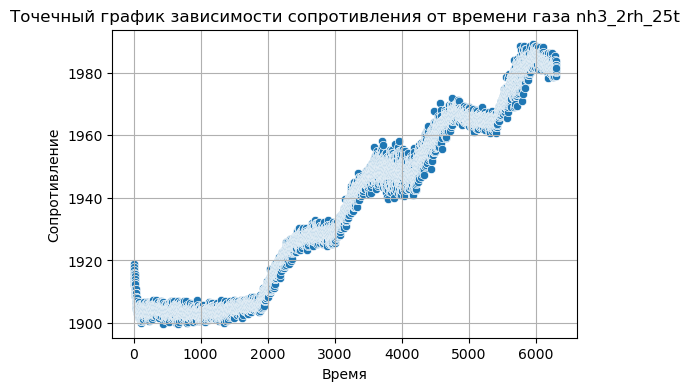

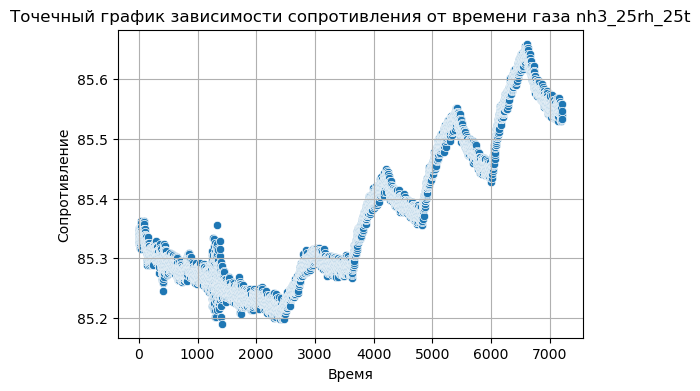

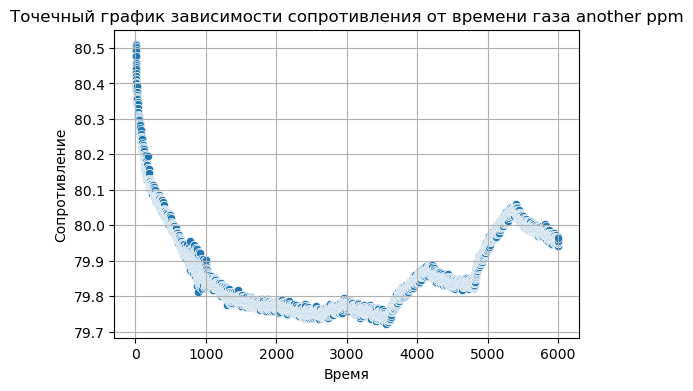

In [4]:
#графики NH3 при одинаковой температуре и разной влажности
nh3_2rh_25t_graph= dependency_graphs(nh3_2rh_25t, title = 'nh3_2rh_25t')
nh3_25rh_25t_graph = dependency_graphs(nh3_25rh_25t, title = 'nh3_25rh_25t')
# nh3_50rh_25t_graph = dependency_graphs(nh3_50rh_25t, title = 'nh3_50rh_25t')
# nh3_75rh_25t_graph = dependency_graphs(nh3_75rh_25t, title = 'nh3_75rh_25t')

nh3_2rh_25t_another_ppm_graph = dependency_graphs(nh3_2rh_25t_another_ppm, title='another ppm')

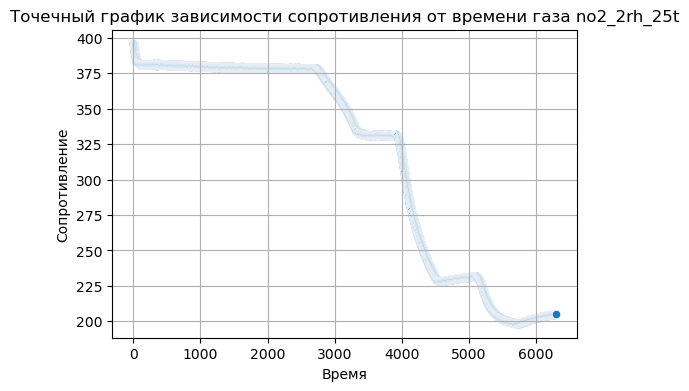

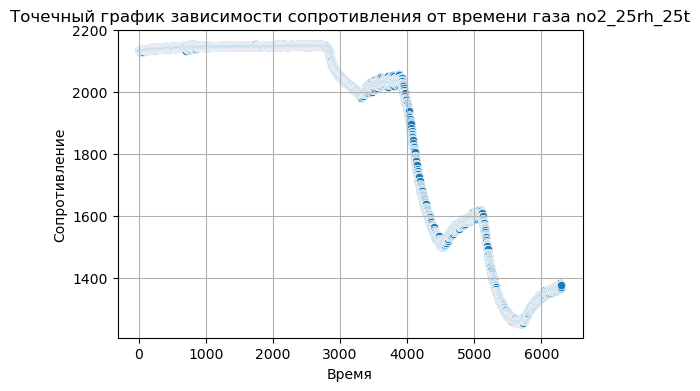

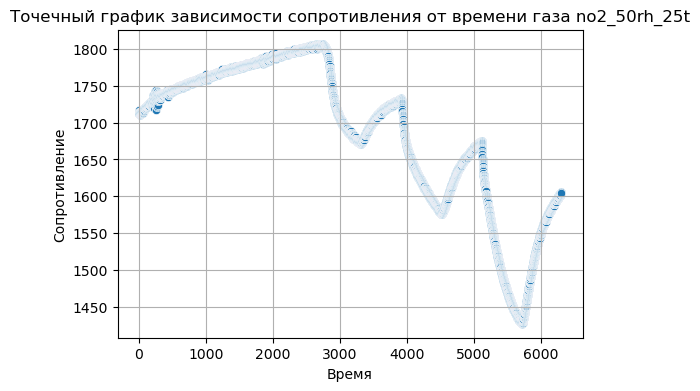

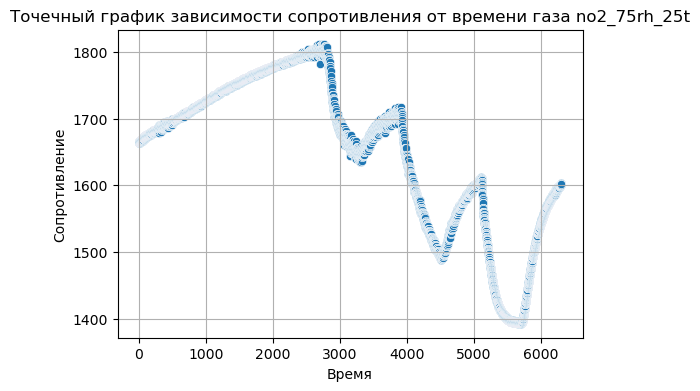

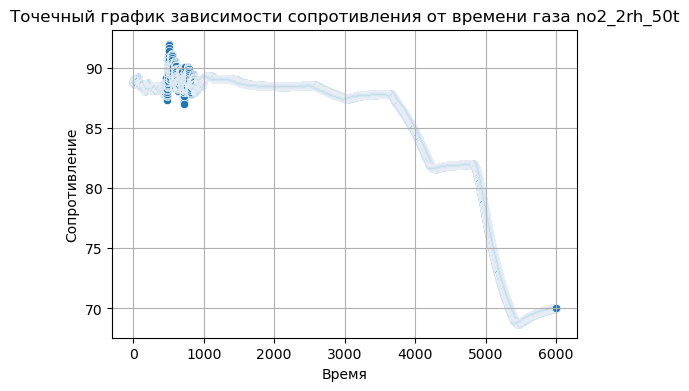

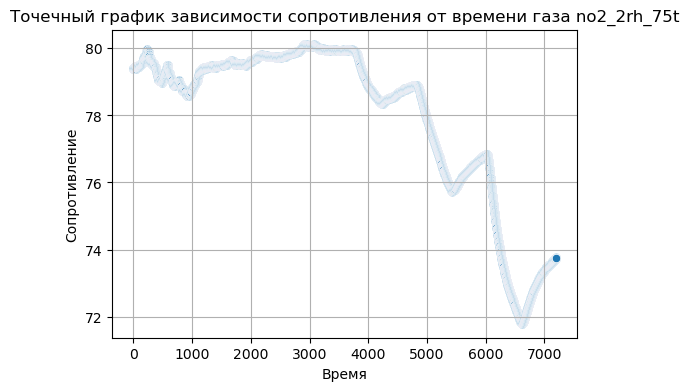

In [179]:
#графики NO2 при одинаковой температуре и разной влажности
no2_2rh_25t_graph = dependency_graphs(no2_2rh_25t, title = 'no2_2rh_25t')
no2_25rh_25t_graph = dependency_graphs(no2_25rh_25t, title = 'no2_25rh_25t')
no2_50rh_25t_graph = dependency_graphs(no2_50rh_25t, title = 'no2_50rh_25t')
no2_75rh_25t_graph = dependency_graphs(no2_75rh_25t, title='no2_75rh_25t')

#графики NO2 при температуре 50t
no2_2rh_50t_graph = dependency_graphs(no2_2rh_50t, title = 'no2_2rh_50t')

#графики NO2 при температуре 75t
no2_2rh_75t_graph = dependency_graphs(no2_2rh_75t,title='no2_2rh_75t')

In [180]:
#функция для обработки - добавим отдельный столбик с температурой, с относительнеой влажностью(для каждого файла она своя, но постоянная)
def temperature_and_RH(df,t,rh):
    df['temperature[°C]'] = t
    df['RH[%]']=rh
    return df

#NH3 temp = 25s
nh3_2rh_25t = temperature_and_RH(nh3_2rh_25t,25,2)
nh3_25rh_25t = temperature_and_RH(nh3_2rh_25t,25,25)
# nh3_50rh_25t = temperature_and_RH(nh3_50rh_25t,25,50)
# nh3_75rh_25t = temperature_and_RH(nh3_75rh_25t,25,75)
nh3_2rh_25t_another_ppm = temperature_and_RH(nh3_2rh_25t_another_ppm,25,2)

#NO2 temp = 25
no2_2rh_25t = temperature_and_RH(no2_2rh_25t,25,2)
no2_25rh_25t = temperature_and_RH(no2_25rh_25t,25,25)
no2_50rh_25t = temperature_and_RH(no2_50rh_25t,25,50)
no2_75rh_25t = temperature_and_RH(no2_75rh_25t,25,75)

#NO2 temp = 50
no2_2rh_50t = temperature_and_RH(no2_2rh_50t,50,2)

#NO2 temp = 75
no2_2rh_75t = temperature_and_RH(no2_2rh_75t,75,2)
#вывод
#nh3_50rh_25t

In [181]:
# #ЗДЕСЬ ВОЗНИКАЮТ НАНЫ, избавление он nan'ов происходит ниже
# #ДОСТАТОЧНО МНОГО НУЛЕЙ ПОЯВЛЯЕТСЯ В СТОЛБЦЕ ПЕРИОДА 
# #функция для вычисления sin_time и cos_time

def sin_time_and_cos_time(df, time_column,R_column):
    df['period'] = df[R_column].diff()
    #print((df['period'] == 0).sum())
    #чтобы не появлялось нанов в столбцах с косинусом и синусом
    df.dropna(subset=['period'], inplace=True)

    df['sin_time'] = np.sin(2 * np.pi * df[time_column] / df['period'])
    df['cos_time'] = np.cos(2 * np.pi * df[time_column] / df['period'])
#удаляем временный столбец 'period'
    df.drop('period', axis=1, inplace=True)
    return df

#NH3 temp = 25
nh3_2rh_25t = sin_time_and_cos_time(nh3_2rh_25t,'Time [с]','R [Ом]')
nh3_25rh_25t = sin_time_and_cos_time(nh3_25rh_25t,'Time [с]','R [Ом]')
# nh3_50rh_25t = sin_time_and_cos_time(nh3_50rh_25t,'Time [с]','R [Ом]')
# nh3_75rh_25t = sin_time_and_cos_time(nh3_75rh_25t,'Time [с]','R [Ом]')
nh3_2rh_25t_another_ppm = sin_time_and_cos_time(nh3_2rh_25t_another_ppm, 'Time [с]','R [Ом]')

#NO2 temp = 25
no2_2rh_25t  = sin_time_and_cos_time(no2_2rh_25t,'Time [с]','R [Ом]')
no2_25rh_25t = sin_time_and_cos_time(no2_25rh_25t,'Time [с]','R [Ом]')
no2_50rh_25t = sin_time_and_cos_time(no2_50rh_25t,'Time [с]','R [Ом]')
no2_75rh_25t = sin_time_and_cos_time(no2_75rh_25t,'Time [с]','R [Ом]')

#NO2 temp = 50
no2_2rh_50t = sin_time_and_cos_time(no2_2rh_50t,'Time [с]','R [Ом]')

#NO2 temp = 75
no2_2rh_75t = sin_time_and_cos_time(no2_2rh_75t,'Time [с]','R [Ом]')

#вывод
#nh3_50rh_25t

c:\Users\katya\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sin
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\katya\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in cos
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\katya\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sin
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\katya\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in cos
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\katya\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sin
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\katya\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in cos
  r

In [182]:
#удаляем наны в датафрейме, а точнее заменяем их на предыдущее значение

#NH3 temp = 25
nh3_2rh_25t.fillna(method = "ffill", inplace=True)
nh3_25rh_25t.fillna(method = "ffill", inplace=True)
# nh3_50rh_25t.fillna(method = "ffill", inplace=True)
# nh3_75rh_25t.fillna(method = 'ffill', inplace=True)
nh3_2rh_25t_another_ppm.fillna(method='ffill', inplace=True)

#NO2 temp = 25
no2_2rh_25t.fillna(method='ffill', inplace=True)
no2_25rh_25t.fillna(method='ffill', inplace=True)
no2_50rh_25t.fillna(method='ffill', inplace=True)
no2_75rh_25t.fillna(method='ffill', inplace=True)

#NO2 temp = 50
no2_2rh_50t.fillna(method='ffill', inplace=True)

#NO2 temp = 75
no2_2rh_75t.fillna(method='ffill', inplace=True)

C:\Users\katya\AppData\Local\Temp\ipykernel_7684\1258551570.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nh3_2rh_25t.fillna(method = "ffill", inplace=True)
C:\Users\katya\AppData\Local\Temp\ipykernel_7684\1258551570.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nh3_25rh_25t.fillna(method = "ffill", inplace=True)
C:\Users\katya\AppData\Local\Temp\ipykernel_7684\1258551570.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nh3_2rh_25t_another_ppm.fillna(method='ffill', inplace=True)
C:\Users\katya\AppData\Local\Temp\ipykernel_7684\1258551570.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  no2_2rh_25t.fillna(

In [183]:
#проверка на отсутствие нанов

#NH3 temp = 25
nh3_2rh_25t.isnull().sum()
nh3_25rh_25t.isnull().sum()
# nh3_50rh_25t.isnull().sum()
# nh3_75rh_25t.isnull().sum()
nh3_2rh_25t_another_ppm.isnull().sum()

#NO2 temp = 25
no2_2rh_25t.isnull().sum()
no2_25rh_25t.isnull().sum()
no2_50rh_25t.isnull().sum()
no2_75rh_25t.isnull().sum()

#NO2 temp = 50
no2_2rh_50t.isnull().sum()

#NO2 temp = 75
no2_2rh_75t.isnull().sum()

R [Ом]             0
Time [с]           0
temperature[°C]    0
RH[%]              0
sin_time           0
cos_time           0
dtype: int64

In [184]:
# вывод для NH3
#nh3_75rh_25t

In [185]:
# вывод для NO2
no2_2rh_50t

,R [Ом],Time [с],temperature[°C],RH[%],sin_time,cos_time
1,88.843826,0.5,50,2,-0.163744,-0.986503
2,88.834457,1.0,50,2,0.996219,-0.086873
3,88.815331,1.5,50,2,-0.461733,-0.887019
4,88.792435,2.0,50,2,-0.800755,-0.598992
5,88.759697,2.5,50,2,-0.752252,-0.658876
...,...,...,...,...,...,...
11995,70.063362,6000.0,50,2,-0.909632,0.415415
11996,70.058319,6000.5,50,2,-0.661205,0.750205
11997,70.057709,6001.0,50,2,-0.587785,-0.809017
11998,70.056137,6001.5,50,2,-0.151914,-0.988394


In [186]:
# #нормализуем наши данные
# def normalization(df):
#     x_min = min(df['R [Ом]'])
#     x_max = max(df['R [Ом]'])
#     t_max = max(df['Time [с]'])
#     t_min = min(df['Time [с]'])
#     df['R [Ом]'] = (df['R [Ом]'] - x_min)/(x_max - x_min)#обычная мин макс
#     df['Time [с]'] = (df['Time [с]'] - t_min)/(t_max - t_min)
#     return df

# #NH3 temp = 25
# nh3_2rh_25t = normalization(nh3_2rh_25t)
# nh3_25rh_25t = normalization(nh3_25rh_25t)
# nh3_50rh_25t = normalization(nh3_50rh_25t)
# nh3_75rh_25t = normalization(nh3_75rh_25t)

# #NO2 temp = 25
# no2_2rh_25t = normalization(no2_2rh_25t)
# no2_25rh_25t = normalization(no2_25rh_25t)
# no2_50rh_25t = normalization(no2_50rh_25t)
# no2_75rh_25t = normalization(no2_75rh_25t)

# #NO2 temp = 50
# no2_2rh_50t = normalization(no2_2rh_50t)

# #вывод
# no2_2rh_50t


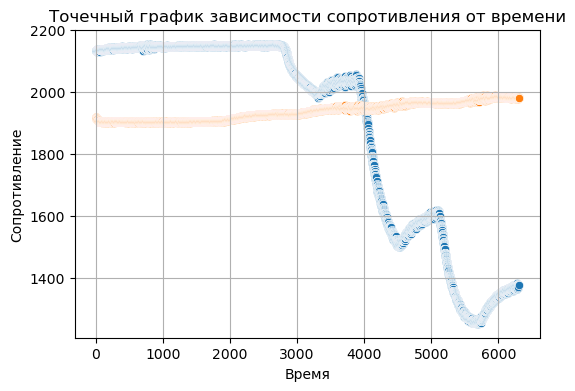

In [187]:
#проверим. что при нормализации ничего толком не поменялось, а также посмотрим на зависимость
def two_graphs(gas1, gas2):
    gas1 = gas1.iloc[1:]
    gas2 = gas2.iloc[1:]

    # Построим точечный график
    plt.figure(figsize=(6, 4))# размер графика
    sns.scatterplot(x='Time [с]', y='R [Ом]', data=gas1)# что и откуда берем
    sns.scatterplot(x='Time [с]', y='R [Ом]', data=gas2)

    plt.xlabel('Время')#ну как бы просто название
    plt.ylabel('Сопротивление')#название игрека
    plt.title('Точечный график зависимости сопротивления от времени')
    plt.grid(True)#добавим сеточку

    return plt.show()
dependency_graph = two_graphs(no2_25rh_25t, nh3_2rh_25t)#первый график - синий, второй - оранжевый

### Теперь добавим целевую переменную

In [188]:
#целевая переменная
def target(df,value):
    df['y'] = value
    return df

#NH3 temp = 25
nh3_2rh_25t = target(nh3_2rh_25t,1)
nh3_25rh_25t = target(nh3_25rh_25t,1)
# nh3_50rh_25t = target(nh3_50rh_25t,1)
# nh3_75rh_25t = target(nh3_75rh_25t,1)
nh3_2rh_25t_another_ppm = target(nh3_2rh_25t_another_ppm,1)

#NO2 temp = 25
no2_2rh_25t = target(no2_2rh_25t,0)
no2_25rh_25t = target(no2_25rh_25t,0)
no2_50rh_25t = target(no2_50rh_25t,0)
no2_75rh_25t = target(no2_75rh_25t,0)

#NO2 temp = 50
no2_2rh_50t = target(no2_2rh_50t,0)

#NO2 temp = 75
no2_2rh_75t = target(no2_2rh_75t,0)

#вывод
no2_2rh_25t

,R [Ом],Time [с],temperature[°C],RH[%],sin_time,cos_time,y
1,395.760040,0.5,25,2,0.007938,0.999968,0
2,395.316315,1.0,25,2,-0.999738,-0.022901,0
3,395.515015,1.5,25,2,-0.303459,-0.952844,0
4,395.395874,2.0,25,2,0.973264,0.229688,0
5,395.259003,2.5,25,2,-0.995365,-0.096165,0
...,...,...,...,...,...,...,...
12595,205.186600,6300.0,25,2,-0.580102,0.814544,0
12596,205.107727,6300.5,25,2,0.561022,0.827801,0
12597,205.248077,6301.0,25,2,-0.958055,0.286585,0
12598,205.188324,6301.5,25,2,-0.575255,-0.817974,0


In [189]:
##############ДЛЯ ТРЭЙН ТЕСТА###########################
########ВНИМАНИЕ#####
#данные для обучения состоят только из конкатенации этих двух файлов
common_data = pd.concat([nh3_2rh_25t,no2_2rh_25t, nh3_25rh_25t, nh3_2rh_25t_another_ppm, no2_2rh_75t,
                         no2_25rh_25t,no2_50rh_25t, no2_75rh_25t, no2_2rh_50t], ignore_index=True)

# Отделим целевую переменную в список
target_data = common_data['y'].tolist()

#теперь избавимся от столбца y
common_data_no_y = common_data.drop('y', axis = 1)

#Преобразуем теперь наши данные в список(для обучения надо так)
def dataframe_to_list_of_lists(df):
    """Преобразует датафрейм в список списков, где каждый внутренний список представляет строку датафрейма"""
    list_of_lists = []
    for _, row in df.iterrows():
        list_of_lists.append(row.tolist())
    return list_of_lists

X_data = dataframe_to_list_of_lists(common_data_no_y)
X_data

[[1917.7991943359375,
  1.0,
  25.0,
  25.0,
  -0.9508073898608804,
  -0.30978267767249323],
 [1914.12939453125, 1.5, 25.0, 25.0, -0.5424856504063892, -0.8400650683745616],
 [1916.4315185546875,
  2.0,
  25.0,
  25.0,
  -0.7342673820726751,
  0.6788603771204651],
 [1915.6143798828125,
  2.5,
  25.0,
  25.0,
  -0.36494572562914385,
  0.931028795121299],
 [1916.8760986328125, 3.0, 25.0, 25.0, 0.694969261531932, -0.7190394464323645],
 [1916.2152099609375,
  3.5,
  25.0,
  25.0,
  -0.9587015408846493,
  -0.2844140564483393],
 [1916.800537109375, 4.0, 25.0, 25.0, -0.8646023566326752, 0.5024567293859485],
 [1917.1151123046875,
  4.5,
  25.0,
  25.0,
  0.9408683797736256,
  -0.3387723305439106],
 [1914.8408203125, 5.0, 25.0, 25.0, -0.9480747168544161, 0.31804768708704473],
 [1915.7005615234375, 5.5, 25.0, 25.0, 0.6015557290127884, -0.798830836217464],
 [1916.0147705078125, 6.0, 25.0, 25.0, 0.5650475654715369, 0.8250583305165091],
 [1917.7833251953125,
  6.5,
  25.0,
  25.0,
  -0.8919104331926

In [190]:
# ########  NH3 temp = 25 #############

# #nh3_25rh
# y_test_nh3_25rh_25t = nh3_25rh_25t['y'].tolist()
# #теперь избавимся от столбца y
# test_nh3_25rh_25t_no_y = nh3_25rh_25t.drop('y', axis = 1)
# X_test_nh3_25rh_25t = dataframe_to_list_of_lists(test_nh3_25rh_25t_no_y)


# #nh3_50rh
# y_test_nh3_50rh_25t = nh3_50rh_25t['y'].tolist()
# #теперь избавимся от столбца y
# test_nh3_50rh_25t_no_y = nh3_50rh_25t.drop('y', axis = 1)
# X_test_nh3_50rh_25t = dataframe_to_list_of_lists(test_nh3_50rh_25t_no_y)


# #nh3_75rh
# y_test_nh3_75rh_25t = nh3_75rh_25t['y'].tolist()
# #теперь избавимся от столбца y
# test_nh3_75rh_25t_no_y = nh3_75rh_25t.drop('y', axis = 1)
# X_test_nh3_75rh_25t = dataframe_to_list_of_lists(test_nh3_75rh_25t_no_y)

In [191]:
# ############ NO2 temp = 25 ###########

# #no2_25rh
# y_test_no2_25rh_25t = no2_25rh_25t['y'].tolist()
# #теперь избавимся от столбца y
# test_no2_25rh_25t_no_y = no2_25rh_25t.drop('y', axis = 1)
# X_test_no2_25rh_25t = dataframe_to_list_of_lists(test_no2_25rh_25t_no_y)


# #no2_50rh
# y_test_no2_50rh_25t = no2_50rh_25t['y'].tolist()
# #теперь избавимся от столбца y
# test_no2_50rh_25t_no_y = no2_50rh_25t.drop('y', axis = 1)
# X_test_no2_50rh_25t = dataframe_to_list_of_lists(test_no2_50rh_25t_no_y)


# #no2_75rh
# y_test_no2_75rh_25t = no2_75rh_25t['y'].tolist()
# #теперь избавимся от столбца y
# test_no2_75rh_25t_no_y = no2_75rh_25t.drop('y', axis = 1)
# X_test_no2_75rh_25t = dataframe_to_list_of_lists(test_no2_75rh_25t_no_y)

In [192]:
# ######### NO2 temp = 50 ###########33

# #no2_2rh
# y_test_no2_2rh_50t = no2_2rh_50t['y'].tolist()
# #теперь избавимся от столбца y
# test_no2_2rh_50t_no_y = no2_2rh_50t.drop('y', axis = 1)
# X_test_no2_2rh_50t = dataframe_to_list_of_lists(test_no2_2rh_50t_no_y)

### Здесь теория по реккурентной сети

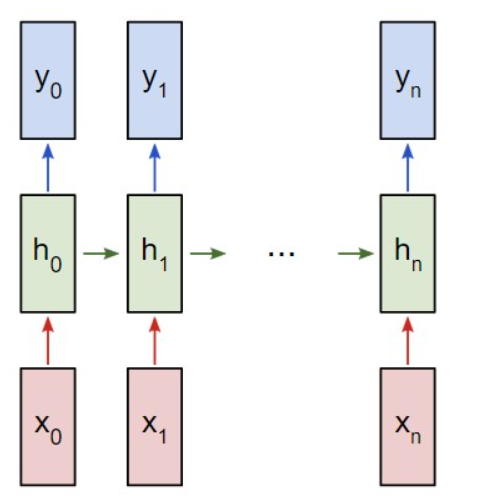

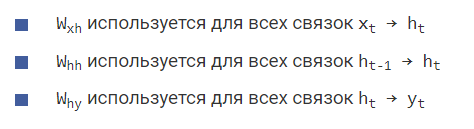

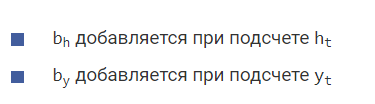

## Для функции forward

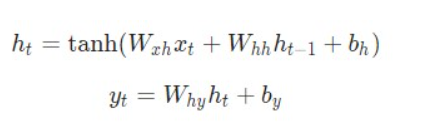

## Для функции backprop

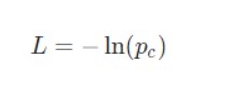

Если позитивный текст предсказывается как позитивный - то:

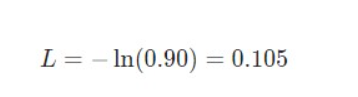

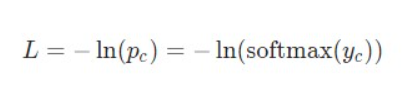

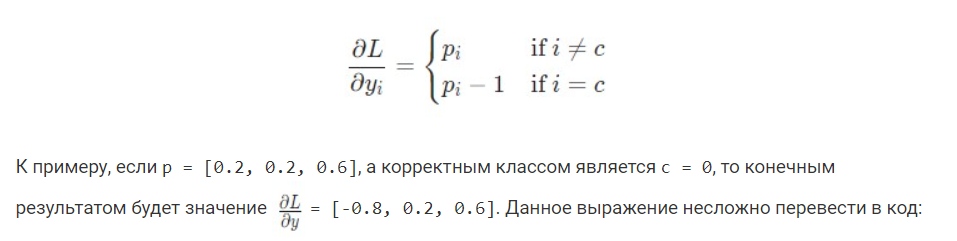

In [193]:
# Разделение на тренировочную и валидационную выборки
# в целом здесь можно конечно посмотреть и еще некоторые атрибуты, чтобы разделит удобно, но в целом
#итак неплохо 
X_train, X_val, y_train, y_val = train_test_split(X_data, target_data, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

print(f"Размер тренировочной выборки: {len(X_train)}")
print(f"Размер валидационной выборки: {len(X_val)}")
print(f"Размер тестовой выборки: {len(X_test)}")
class_0_count = 0
class_1_count = 0

for element in y_test:
    if element == 0:
        class_0_count += 1
    elif element == 1:
        class_1_count += 1

print(f"Количество элементов класса 0(диоксид азота): {class_0_count}")
print(f"Количество элементов класса 1(аммиак): {class_1_count}")


Размер тренировочной выборки: 91182
Размер валидационной выборки: 11398
Размер тестовой выборки: 11398
Количество элементов класса 0(диоксид азота): 7652
Количество элементов класса 1(аммиак): 3746


In [198]:
# Преобразование данных в тензоры PyTorch
x_train_tensor = torch.tensor(X_train, dtype=torch.float32)# из нумпая в тензор, данные как float32 
y_train_tensor = torch.tensor(y_train, dtype=torch.long) #long -  для классификации(указывает типа, что это прям переменные класса именно, а не просто признаки)


x_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)


# Модель RNN
class SimpleRNN(nn.Module):#базовый модуль для всех нейронок библиотеки
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()# конструктор из класса-родителя, для инициализации
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)#dim батча - первая размерность входного тензора
        self.fc = nn.Linear(hidden_size, output_size)#полностью связанный слой, используется для преобразования скрытого состояния в выходной вектор
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        #Создаем тензор нулей, начальное скрытое состояние (h0)
        #1: dim, соответствующая направлению RNN (в данном случае - 1, так как RNN не двунаправленный)
        #x.size(0): Размер батча (количество примеров в батче)
        #self.hidden_size: Размер скрытого состояния
        h0 = torch.zeros(1, x.size(0), self.hidden_size)# Инициализация hidden state, важное изменение для batch_first=True
        out, hn = self.rnn(x, h0) #hn - последнее скрытое состояние, out - выход rnn содержит скрытое состояние на каждом временном шаге
        out = self.fc(out[:, -1, :]) #все элементы батча, посл вр шаг, все знач скрыт. сост.
        out = self.sigmoid(out)
        return out

# Гиперпараметры
input_size = 6# количество элементов в каждом подмассиве нашего массива
hidden_size = 16# подбираем сами, такое количество вполне норм сейчас
output_size = 1# выходной слой
learning_rate = 0.01# размер шага для нашего алгоритма оптимизации
epochs = 300
batch_size = len(X_train)#соответствует длине данных, В ОБЩЕМ СЛУЧАЕ ЛУЧШЕ ЧУТЬ ПОДПРАВИТЬ ЭТО


model = SimpleRNN(input_size, hidden_size, output_size)
criterion = nn.BCELoss() # Бинарная кросс-энтропия
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Обучение
for epoch in range(epochs):
    optimizer.zero_grad()#сбрасываем градиенты оптимизатора до нуля, иначе с расчетом весов будет проблема
    outputs = model(x_train_tensor.unsqueeze(1)) # Добавляем дополнительную размерность для времени
    loss = criterion(outputs.squeeze(1), y_train_tensor.float()) # Снимаем лишнее измерение
    loss.backward()
    optimizer.step()#обновляем веса модели
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            train_predictions = (model(x_train_tensor.unsqueeze(1)) > 0.5).float()
            train_accuracy = accuracy_score(y_train_tensor.numpy(), train_predictions.squeeze(1).numpy())

            # Оценка на валидационных данных
            val_predictions = (model(x_val_tensor.unsqueeze(1)) > 0.5).float()
            val_loss = criterion(val_predictions.squeeze(1), y_val_tensor.float())
            val_accuracy = accuracy_score(y_val_tensor.numpy(), val_predictions.squeeze(1).numpy())

            print(f'Epoch [{epoch+1}/{epochs}], '
                  f'Loss: {loss.item():.4f}, Accuracy: {train_accuracy:.4f}, '
                  f'Val Loss: {val_loss.item():.4f}, Val Accuracy: {val_accuracy:.4f}')


#Оценка точности после обучения
with torch.no_grad():
    predictions = (model(x_train_tensor.unsqueeze(1)) > 0.5).float()
    accuracy = accuracy_score(y_train_tensor.numpy(), predictions.squeeze(1).numpy())
    print(f'\nTrain Accuracy: {accuracy:.4f}')

with torch.no_grad():
    final_val_predictions = (model(x_val_tensor.unsqueeze(1)) > 0.5).float()
    final_val_accuracy = accuracy_score(y_val_tensor.numpy(), final_val_predictions.squeeze(1).numpy())
    print(f'\nValidation Accuracy: {final_val_accuracy:.4f}')


Epoch [10/300], Loss: 0.6260, Accuracy: 0.6746, Val Loss: 33.1637, Val Accuracy: 0.6684
Epoch [20/300], Loss: 0.6087, Accuracy: 0.6746, Val Loss: 33.1637, Val Accuracy: 0.6684
Epoch [30/300], Loss: 0.6010, Accuracy: 0.6746, Val Loss: 33.1637, Val Accuracy: 0.6684
Epoch [40/300], Loss: 0.5980, Accuracy: 0.6757, Val Loss: 33.1023, Val Accuracy: 0.6690
Epoch [50/300], Loss: 0.5947, Accuracy: 0.6876, Val Loss: 32.0319, Val Accuracy: 0.6797
Epoch [60/300], Loss: 0.5907, Accuracy: 0.6746, Val Loss: 33.1637, Val Accuracy: 0.6684
Epoch [70/300], Loss: 0.5906, Accuracy: 0.7134, Val Loss: 29.1981, Val Accuracy: 0.7080
Epoch [80/300], Loss: 0.5823, Accuracy: 0.7190, Val Loss: 28.4962, Val Accuracy: 0.7150
Epoch [90/300], Loss: 0.5632, Accuracy: 0.6959, Val Loss: 30.9089, Val Accuracy: 0.6909
Epoch [100/300], Loss: 0.5590, Accuracy: 0.7488, Val Loss: 25.2851, Val Accuracy: 0.7471
Epoch [110/300], Loss: 0.5813, Accuracy: 0.6881, Val Loss: 31.7863, Val Accuracy: 0.6821
Epoch [120/300], Loss: 0.5849,

In [195]:
#torch.save(model.state_dict(), 'model.pth')

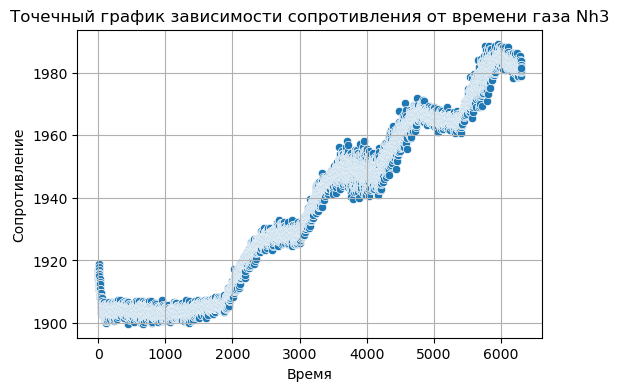

In [196]:
nh3_25rh_25t_graph = dependency_graphs(nh3_25rh_25t, title = 'Nh3')

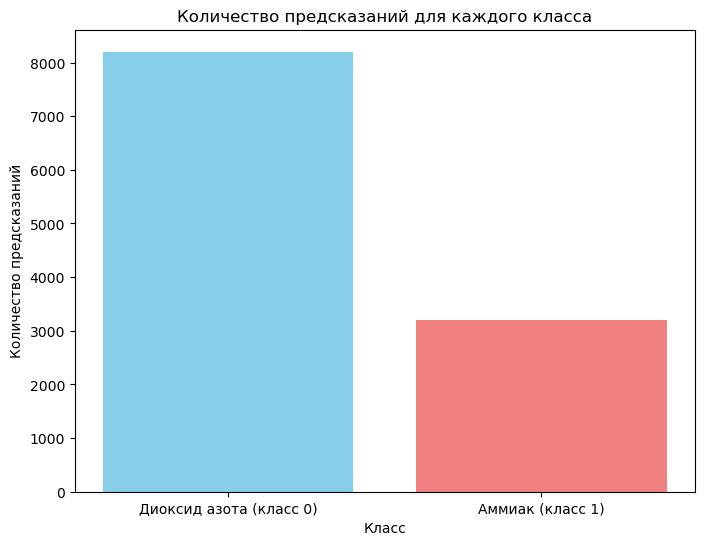

Вероятность принадлежности к классу диоксида азота: 0.7964445054531097 - это диоксид азота
Вероятность принадлежности к классу диоксида азота: 0.526524007320404 - это диоксид азота
Вероятность принадлежности к классу аммиака: 0.8155817985534668 - это аммиак
Вероятность принадлежности к классу диоксида азота: 0.526524007320404 - это диоксид азота
Вероятность принадлежности к классу диоксида азота: 0.7964441180229187 - это диоксид азота
Вероятность принадлежности к классу диоксида азота: 0.7964445054531097 - это диоксид азота
Вероятность принадлежности к классу диоксида азота: 0.7964445054531097 - это диоксид азота
Вероятность принадлежности к классу диоксида азота: 0.5188353061676025 - это диоксид азота
Вероятность принадлежности к классу аммиака: 0.8035392761230469 - это аммиак
Вероятность принадлежности к классу аммиака: 0.8035392761230469 - это аммиак
Вероятность принадлежности к классу диоксида азота: 0.6768254935741425 - это диоксид азота
Вероятность принадлежности к классу аммиака

In [199]:
# Преобразование тестовых данных
x_test_tensor = torch.tensor(X_test, dtype=torch.float32)
#y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Оценка на тестовой выборке
with torch.no_grad():
    test_outputs = model(x_test_tensor.unsqueeze(1))
    test_predictions = (test_outputs > 0.5).float()
    #test_accuracy = accuracy_score(y_test_tensor.numpy(), test_predictions.squeeze(1).numpy())

#print(f'Test Accuracy: {test_accuracy:.4f}')
# Подсчет количества предсказаний для каждого класса
class_counts = test_predictions.squeeze(1).numpy()
unique, counts = np.unique(class_counts, return_counts=True)
class_counts_dict = dict(zip(unique, counts))

# Построение графика
labels = ['Диоксид азота (класс 0)', 'Аммиак (класс 1)']
counts = [class_counts_dict.get(0.0,0), class_counts_dict.get(1.0,0)] #Обработка случая, если какого-то класса нет в предсказаниях

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['skyblue', 'lightcoral'])
plt.title('Количество предсказаний для каждого класса')
plt.ylabel('Количество предсказаний')
plt.xlabel('Класс')
plt.show()

nh3 = 0
no2 = 0
# Логика для вывода класса
for i, prob in enumerate(test_outputs.squeeze(1)):
    if prob.item() > 0.5:
        nh3+=1
        print(f"Вероятность принадлежности к классу аммиака: {prob.item()} - это аммиак")
    else:
        no2+=1
        print(f"Вероятность принадлежности к классу диоксида азота: {1-prob.item()} - это диоксид азота")
print(f"Количество предсказаний за аммиак: {nh3}")
print(f"Количество предсказаний за диоксид азота: {no2}")

выделять тренд попробовать

## Пробуем разные штуки

1) Если убрать данные, аммиак с высокой влажностью, то точность обучения лучше и предсказывается тоже лучше<br>
Может быть, это все-таки связано с тем, что такое в принципе вряд ли получится?